<a href="https://colab.research.google.com/github/proyectoTFMUAH/ANN/blob/main/ANN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#chuleta

#https://www.datacamp.com/community/tutorials/deep-learning-python?utm_campaignid=282657555&utm_adgroupid=1147890695096458&utm_device=c&utm_keyword=keras&utm_matchtype=p&utm_network=o&utm_adpostion=&utm_creative=&utm_targetid=kwd-71743615746804:loc-170&utm_loc_interest_ms=&utm_loc_physical_ms=3203&msclkid=38ccf3d9b04f1045ba9093f9f9c73036&utm_source=bing&utm_medium=cpc&utm_campaign=NEW%20Granular%20Topics%20(via%20DSA%20insights)%20%7C%20Tier%201%20BING&utm_term=keras&utm_content=community%2Ftutorials%2Fdeep-learning-python
# https://www.tensorflow.org/tutorials/load_data/csv

#Cargamos librerias

import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


# Capamos a 3 decimales
np.set_printoptions(precision=3, suppress=True)

#Cargamos el Dataset desde fichero que hemos generado en R
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()



Saving DSEuropea.csv to DSEuropea.csv


In [9]:
#rrevisamos los datos
Pricing_train = pd.read_csv('DSEuropea.csv')
Pricing_train.head()

,Unnamed: 0,vSt,vK,vTmat,vvol,vr,Unnamed: 6
0,1,19.019752,85.864971,53.803172,0.464357,0.057253,18.307547
1,2,69.475322,25.618889,80.115425,0.511415,0.094931,69.469906
2,3,64.124547,30.302197,9.591628,0.078536,0.070882,48.770954
3,4,76.219773,28.674030,7.460327,0.046091,0.054959,57.190492
4,5,60.074539,78.835511,12.979597,0.096357,0.015567,6.578845


In [10]:
#La tarea de este conjunto de datos es predecir el precio, así que separe las características y etiquetas para el entrenamiento:
Pricing_train_features = Pricing_train.copy()
#quitamos el indice y el resultado
#resultado
Pricing_train_results = Pricing_train_features.pop('Unnamed: 6')
#indice
Pricing_indices = Pricing_train_features.pop('Unnamed: 0')

# Empaque las funciones en una sola matriz NumPy :
Pricing_train_features = np.array(Pricing_train_features)
Pricing_train_features

print(Pricing_train_features.shape)


(10000, 5)


Epoch 1/500
313/313 [==============================] - 1s 1ms/step - loss: 1165.7135 - accuracy: 0.0000e+00
Epoch 2/500
313/313 [==============================] - 0s 1ms/step - loss: 49.7373 - accuracy: 0.0000e+00
Epoch 3/500
313/313 [==============================] - 0s 1ms/step - loss: 42.0861 - accuracy: 2.7115e-05
Epoch 4/500
313/313 [==============================] - 0s 1ms/step - loss: 41.7974 - accuracy: 3.6342e-04
Epoch 5/500
313/313 [==============================] - 0s 1ms/step - loss: 38.3176 - accuracy: 9.9322e-04
Epoch 6/500
313/313 [==============================] - 0s 1ms/step - loss: 35.6779 - accuracy: 9.2099e-04
Epoch 7/500
313/313 [==============================] - 0s 1ms/step - loss: 33.1509 - accuracy: 7.0182e-04
Epoch 8/500
313/313 [==============================] - 0s 1ms/step - loss: 35.3316 - accuracy: 9.2287e-04
Epoch 9/500
313/313 [==============================] - 0s 1ms/step - loss: 36.5276 - accuracy: 0.0011
Epoch 10/500
313/313 [==========================

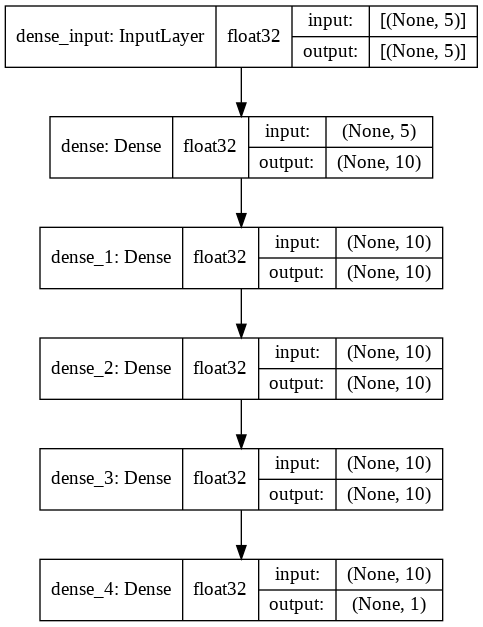

In [11]:

#Sequential

#https://keras.io/guides/sequential_model/
from tensorflow import keras

#define el modelo
modelEuropeanoption = tf.keras.Sequential([
  layers.Dense(10,activation='relu'),
  layers.Dense(10,activation='relu'),
  layers.Dense(10,activation='relu'),
  layers.Dense(10,activation='relu'),
  layers.Dense(1)
])
#compilar modelo
modelEuropeanoption.compile(loss = tf.losses.MeanSquaredError(),
                              metrics=['accuracy'],
                      optimizer = tf.optimizers.Adam())

# entrernar el modelo

modelEuropeanoption.fit(Pricing_train_features, Pricing_train_results, epochs=500)

#revisar modelo
modelEuropeanoption.summary()
len(modelEuropeanoption.weights)
keras.utils.plot_model(modelEuropeanoption, show_shapes=True,show_dtype=True)

In [12]:
#SAlvar el modleo y predicifr

#https://www.machinecurve.com/index.php/2020/02/14/how-to-save-and-load-a-model-with-keras/#predictions-for-new-data
#https://victorzhou.com/blog/keras-cnn-tutorial/

prediction = modelEuropeanoption.predict(Pricing_train_features)

# show the inputs and predicted outputs
for i in range(len(Pricing_train_features)):
	print("X=%s, Predicted=%s" % (Pricing_train_features[i], prediction[i]))


Se han truncado las últimas 5000 líneas del flujo de salida.
X=[85.294 49.557 22.161  0.377  0.053], Predicted=[76.13]
X=[64.005 54.583 67.021  0.582  0.072], Predicted=[62.693]
X=[23.488 79.041 65.953  0.294  0.074], Predicted=[22.149]
X=[18.942 97.603 17.728  0.763  0.045], Predicted=[15.066]
X=[ 25.112  77.944 114.835   0.194   0.029], Predicted=[23.598]
X=[73.682 75.102 58.674  0.585  0.007], Predicted=[71.657]
X=[  3.646  21.016 110.926   0.383   0.008], Predicted=[3.241]
X=[37.922 92.505 41.74   0.108  0.022], Predicted=[20.917]
X=[89.192 35.565 70.262  0.069  0.048], Predicted=[87.377]
X=[52.53  53.209 23.191  0.639  0.008], Predicted=[47.461]
X=[85.136 11.9   13.984  0.313  0.099], Predicted=[82.399]
X=[96.381 50.04  58.354  0.02   0.042], Predicted=[88.761]
X=[ 6.567 23.681 23.158  0.711  0.059], Predicted=[5.017]
X=[23.921  4.113 20.601  0.686  0.079], Predicted=[23.327]
X=[56.014 72.754 45.954  0.574  0.002], Predicted=[51.814]
X=[12.959  1.593 25.546  0.458  0.076], Predict

In [14]:

#Calculamos el error de los datos del training
Pricing_train_results.head()

MSEi=0
for i in range(len(Pricing_train_results)):
  MSEi=MSEi+(prediction[i]-Pricing_train_results[i])**2
MSE=MSEi/len(Pricing_train_results)
print(MSE)            

MDi=0
for i in range(len(Pricing_train_results)):
  MDi=MDi+(prediction[i]-Pricing_train_results[i])
MD=MDi/len(Pricing_train_results)
print(MD)            

MADi=0
for i in range(len(Pricing_train_results)):
  MADi=MADi+abs ((prediction[i]-Pricing_train_results[i]))
MAD=MADi/len(Pricing_train_results)
print(MAD)   

#MAPEi=0
#tmuestra=len(Pricing_train_results)
#for i in range(len(Pricing_train_results)):
 #   if Pricing_train_results[i] > 0:
  #    MAPEi=MAPEi+abs ((prediction[i]-Pricing_train_results[i]))/Pricing_train_results[i]
 #   else:
 #     tmuestra=tmuestra-1  
#MAPEi=MAPEi/tmuestra
#print(MAPEi)   


from sklearn.metrics import r2_score 
R_square = r2_score(prediction,Pricing_train_results) 
print('Coefficient of Determination', R_square) 



[4.321]
[-0.224]
[1.291]
Coefficient of Determination 0.9947813630309518


In [15]:
modelEuropeanoption.save('model')
from google.colab import files
files.download('model')

INFO:tensorflow:Assets written to: model/assets


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
#Calculamos el dato del set de test 

#Cargamos el Dataset desde fichero que hemos generado en R
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Pricing_test= pd.read_csv('TestDSEuropea.csv')
Pricing_test_features = Pricing_test.copy()
#quitamos el indice y el resultado
#resultado
Pricing_test_results = Pricing_test_features.pop('Unnamed: 6')
#indice
Pricing_test_indices = Pricing_test_features.pop('Unnamed: 0')

# Empaque las funciones en una sola matriz NumPy :

Pricing_test_features = np.array(Pricing_test_features)

prediction = modelEuropeanoption.predict(Pricing_test_features)

#Calculamos el error de los datos del training
Pricing_test_results.head()

MSEti=0
for i in range(len(Pricing_test_results)):
  MSEti=MSEti+(prediction[i]-Pricing_test_results[i])**2
MSEt=MSEti/len(Pricing_test_results)
print('MSE',MSEt)            

MDti=0
for i in range(len(Pricing_test_results)):
  MDti=MDti+(prediction[i]-Pricing_test_results[i])
MDt=MDti/len(Pricing_test_results)
print('MD',MDt)            

MADti=0
for i in range(len(Pricing_test_results)):
  MADti=MADti+abs ((prediction[i]-Pricing_test_results[i]))
MADt=MADti/len(Pricing_test_results)
print('MAD',MADt)   

#MAPEi=0
#tmuestra=len(Pricing_test_results)
#for i in range(len(Pricing_test_results)):
 #   if Pricing_test_results[i] > 0:
  #    MAPEi=MAPEi+abs ((prediction[i]-Pricing_test_results[i]))/Pricing_test_results[i]
 #   else:
 #     tmuestra=tmuestra-1  
#MAPEi=MAPEi/tmuestra
#print(MAPEi)   


from sklearn.metrics import r2_score 
R_square = r2_score(prediction,Pricing_test_results) 
print('Coefficient of Determination', R_square) 

Saving TestDSEuropea.csv to TestDSEuropea (1).csv
MSE [4.462]
MD [-0.191]
MAD [1.317]
Coefficient of Determination 0.9945440192327084
